In [ ]:
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_blobs
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
from sklearn.cluster import SpectralClustering as sk_SpectralClustering
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans

In [ ]:
class SpectralClustering :

  def __init__(self, n_cluster, sigma = 1.0) -> None:
    self.n_cluster = n_cluster
    self.sigma = sigma
    self.labels_ = None

  def compute_affinity_matrix(self, X) -> np.ndarray:
    affinity_matrix = np.exp(-squareform(pdist(X, 'sqeuclidean'))/(2*self.sigma**2))
    np.fill_diagonal(affinity_matrix, 0)
    return affinity_matrix

  def compute_degree_matrix(self, affinity_matrix) -> np.ndarray:
    degree_matrix = np.diag(np.sum(affinity_matrix, axis=1))
    return degree_matrix

  def compute_laplacian_matrix(self, degree_matrix, affinity_matrix) -> np.ndarray:
    diag = np.diag(degree_matrix)
    diag = np.diag(1/np.sqrt(diag+1e-8))
    laplacian_matrix = np.eye(diag.shape[0]) - (diag @ affinity_matrix @ diag)
    return laplacian_matrix

  def compute_eigenvectors(self, laplaci  an_matrix) -> np.ndarray:
    eigenvalues, eigenvectors = eigh(laplacian_matrix)
    return eigenvectors[:,1:self.n_cluster+1]

  def fit(self, X) -> None :
    affinity_matrix = self.compute_affinity_matrix(X)
    degree_matrix = self.compute_degree_matrix(affinity_matrix)
    laplacian_matrix = self.compute_laplacian_matrix(degree_matrix, affinity_matrix)
    eigenvectors = self.compute_eigenvectors(laplacian_matrix)
    eigenvectors = eigenvectors / (np.linalg.norm(eigenvectors, axis=1,keepdims=True)+1e-8)
    kmeans = KMeans(n_clusters=self.n_cluster, random_state=0).fit(eigenvectors)
    self.labels_ = kmeans.labels_

  def fit_predict(self, X) -> np.array:
    self.fit(X)
    return self.labels_

Text(0.5, 0, 'X1')

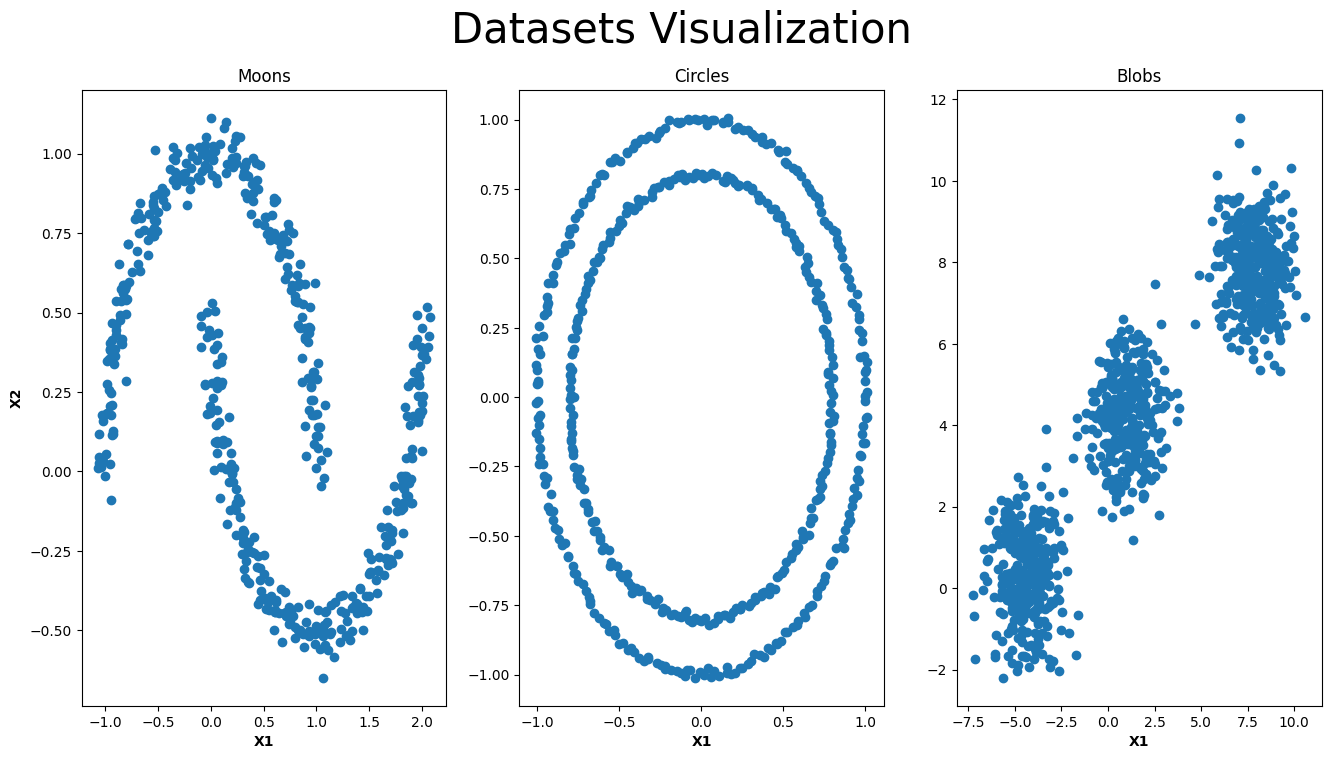

In [ ]:
X1, y1 = make_moons(n_samples=500, noise=0.05,random_state=0)
X2, y2 = make_circles(n_samples=500,noise = 0.01,random_state=0)
X3, y3 = make_blobs(n_samples=1000, centers=3, random_state=3)

fig, axes = plt.subplots(1, 3, figsize=(16, 8))
fig.suptitle('Datasets Visualization',fontsize = 30)
axes[0].scatter(X1[:,0],X1[:,1])
axes[0].set_title('Moons')
axes[0].set_xlabel('X1',fontweight='bold')
axes[0].set_ylabel('X2',fontweight='bold')
axes[1].scatter(X2[:,0],X2[:,1])
axes[1].set_title('Circles')
axes[1].set_xlabel('X1',fontweight='bold')
axes[2].scatter(X3[:,0],X3[:,1])
axes[2].set_title('Blobs');
axes[2].set_xlabel('X1',fontweight='bold')

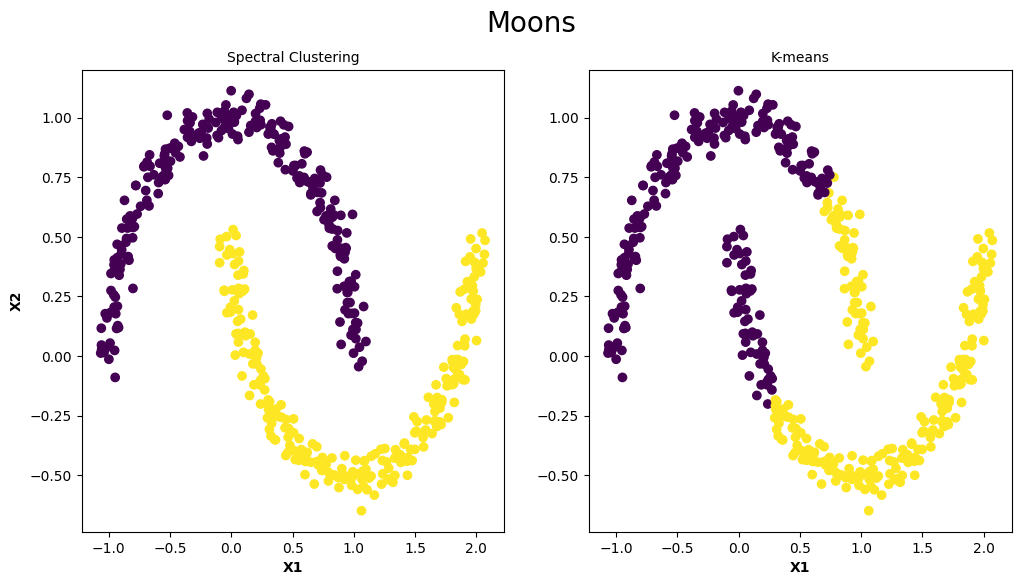

In [ ]:
k_means = KMeans(n_clusters=2, random_state=0)
label_k_means = k_means.fit_predict(X1)

model1 = SpectralClustering(n_cluster=2, sigma=0.1)
label1 = model1.fit_predict(X1)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Moons',fontsize = 20)
axes[0].set_title('Spectral Clustering',fontsize = 10)
axes[1].set_title('K-means',fontsize = 10)
axes[0].set_xlabel('X1',fontweight='bold')
axes[0].set_ylabel('X2',fontweight='bold')
axes[1].set_xlabel('X1',fontweight='bold')
axes[0].scatter(X1[:,0],X1[:,1],c=label1)
axes[1].scatter(X1[:,0],X1[:,1],c=label_k_means)
plt.show()

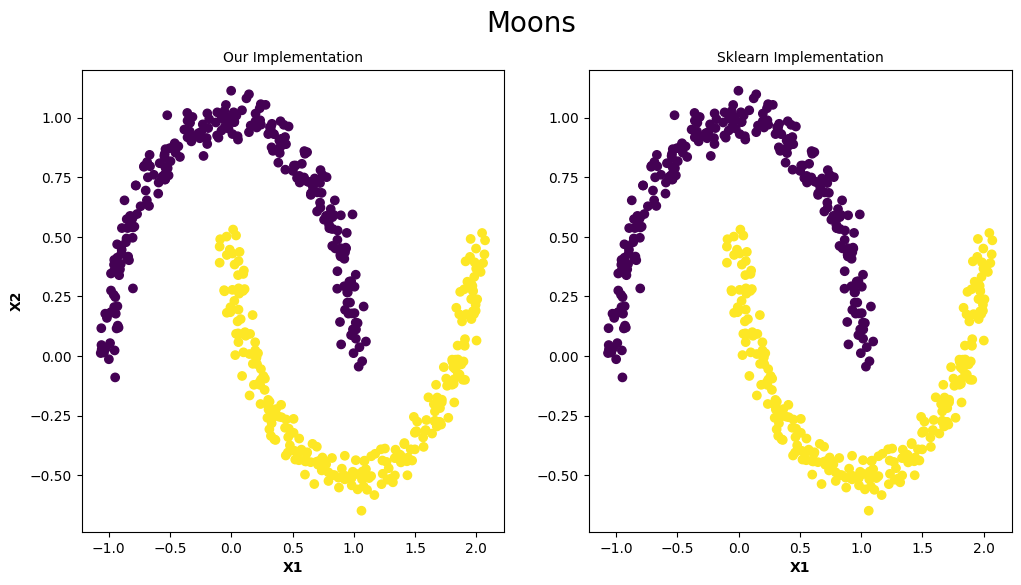

In [ ]:
sk_model1 = sk_SpectralClustering(n_clusters=2, affinity='rbf', gamma=50)
label1_sk = sk_model1.fit_predict(X1)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Moons',fontsize = 20)
axes[0].set_title('Our Implementation',fontsize = 10)
axes[1].set_title('Sklearn Implementation',fontsize = 10)
axes[0].set_xlabel('X1',fontweight='bold')
axes[0].set_ylabel('X2',fontweight='bold')
axes[1].set_xlabel('X1',fontweight='bold')
axes[0].scatter(X1[:,0],X1[:,1],c=label1)
axes[1].scatter(X1[:,0],X1[:,1],c=label1_sk)
plt.show()

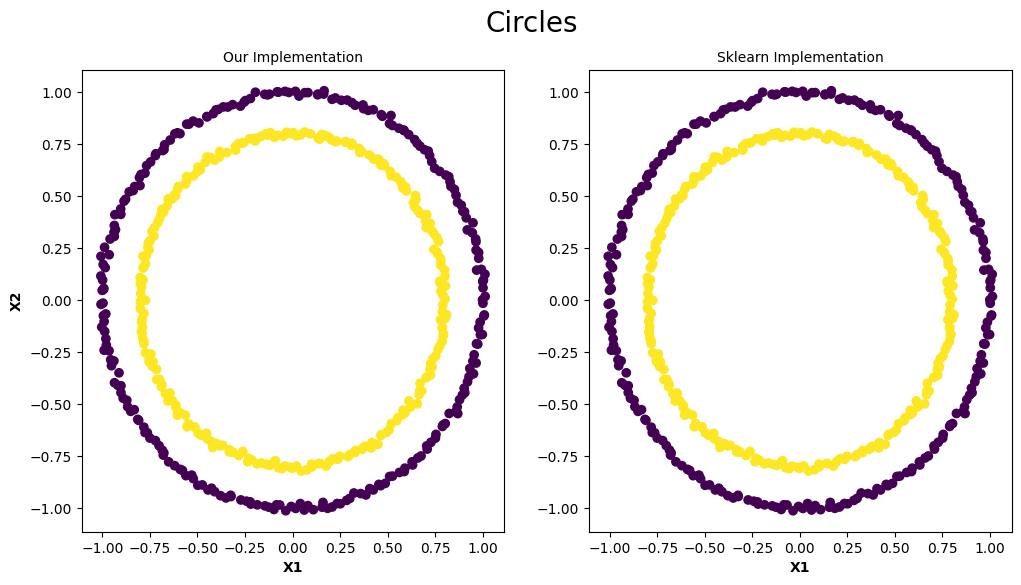

In [ ]:
model2 = SpectralClustering(n_cluster=2, sigma=0.05)
label2 = model2.fit_predict(X2)

sk_model2 = sk_SpectralClustering(n_clusters=2, affinity='rbf', gamma=200)
label2_sk = sk_model2.fit_predict(X2)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Circles',fontsize = 20)
axes[0].set_title('Our Implementation',fontsize = 10)
axes[1].set_title('Sklearn Implementation',fontsize = 10)
axes[0].set_xlabel('X1',fontweight='bold')
axes[0].set_ylabel('X2',fontweight='bold')
axes[1].set_xlabel('X1',fontweight='bold')
axes[0].scatter(X2[:,0],X2[:,1],c=label2)
axes[1].scatter(X2[:,0],X2[:,1],c=label2_sk)
plt.show()

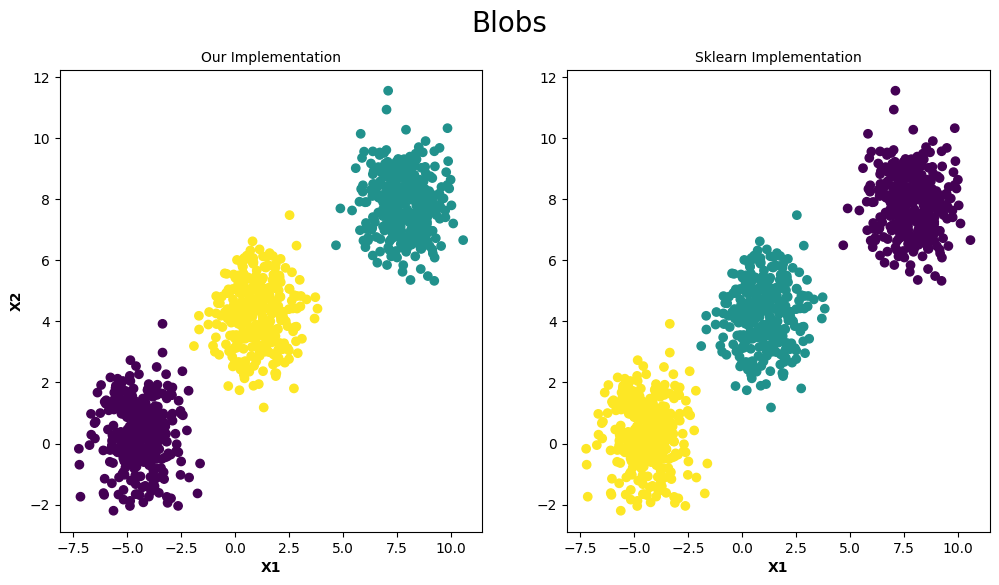

In [ ]:
model3 = SpectralClustering(n_cluster=3, sigma=1)
label3 = model3.fit_predict(X3)

sk_model3 = sk_SpectralClustering(n_clusters=3, affinity='rbf', gamma=0.5)
label3_sk = sk_model3.fit_predict(X3)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Blobs',fontsize = 20)
axes[0].set_title('Our Implementation',fontsize = 10)
axes[1].set_title('Sklearn Implementation',fontsize = 10)
axes[0].set_xlabel('X1',fontweight='bold')
axes[0].set_ylabel('X2',fontweight='bold')
axes[1].set_xlabel('X1',fontweight='bold')
axes[0].scatter(X3[:,0],X3[:,1],c=label3)
axes[1].scatter(X3[:,0],X3[:,1],c=label3_sk)
plt.show()

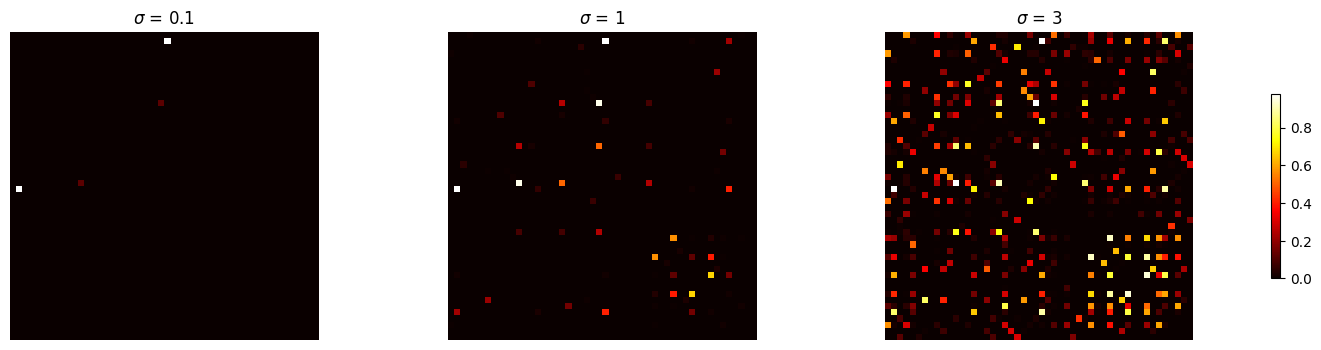

In [ ]:
X_heat, _ = make_moons(n_samples=50, noise=10, random_state=42)
sigmas = [0.1,1,3]
fig, axes = plt.subplots(1, len(sigmas), figsize=(20, 4))
for ax,sigma in zip(axes,sigmas) :
  pairwise_sq_dists = squareform(pdist(X_heat, 'sqeuclidean'))
  A = np.exp(-pairwise_sq_dists / (2*sigma**2))
  np.fill_diagonal(A, 0)
  im = ax.imshow(A, cmap='hot')
  ax.set_title(f"$\\sigma$ = {sigma}")
  ax.axis('off')

fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6)
plt.show()